# HW3

Submitted by Russel Jade Tumanon

# Import Libraries

In [1]:
#Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

#For Preprocessing
from sklearn.model_selection import train_test_split

#For Building the Model
from sklearn.linear_model import LinearRegression

#For Validation of the Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the Dataset

In [2]:
# Load the Advertising.csv dataset as df
df = pd.read_csv("Advertising.csv", index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Standardize

In [3]:
#Standardize each column

df_col= df[df.columns]

#Standard deviation
df_std = df_col.std()
#Mean
df_mean = df_col.mean()

df[df.columns] = (df_col-df_mean)/df_std 

df

,TV,radio,newspaper,sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


# Drop and add a Column

In [4]:
#Adding an extra column x, composing of all ones
df.insert(0,'X',[1]*len(df))

df

,X,TV,radio,newspaper,sales
1,1,0.967425,0.979066,1.774493,1.548168
2,1,-1.194379,1.080097,0.667903,-0.694304
3,1,-1.512360,1.524637,1.779084,-0.905135
4,1,0.051919,1.214806,1.283185,0.858177
5,1,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...
196,1,-1.267759,-1.317724,-0.769287,-1.230964
197,1,-0.615491,-1.236899,-1.031011,-0.828469
198,1,0.348934,-0.940539,-1.109069,-0.234310
199,1,1.590574,1.261955,1.636743,2.199827


In [5]:
#Dropping sales

x=df.drop(columns=['sales'])
y=df['sales']

x

,X,TV,radio,newspaper
1,1,0.967425,0.979066,1.774493
2,1,-1.194379,1.080097,0.667903
3,1,-1.512360,1.524637,1.779084
4,1,0.051919,1.214806,1.283185
5,1,0.393196,-0.839507,1.278593
...,...,...,...,...
196,1,-1.267759,-1.317724,-0.769287
197,1,-0.615491,-1.236899,-1.031011
198,1,0.348934,-0.940539,-1.109069
199,1,1.590574,1.261955,1.636743


# Dividing the Dataset into Training and Testing

In [6]:
#15% is allocated to the test set (I feel Like it should be 15 because if it's 25, it will ot be equal to 100)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Fit the model on the training set.

In [7]:
#Initialize weights
def initialize_weights():
    #Alternative
    init_w = np.array([0.0, 0.0, 0.0, 0.0])
    return init_w

In [8]:
#Predict 
#Returns a vector of the predicted values y_hat^(i)
def predict(x, weights): 
    return np.dot(x, weights)

In [9]:
#Cost 
#Returns a scalar value that tells us how accurate the model is
def compute_cost(y,y_hat):
    sq = np.square(y_hat-y)
    y_shape = y.shape[0]
    #Formula
    cost = np.sum(sq)/(2*y_shape)
    return cost

In [10]:
#Gradient 
#Returns a matrix w
def compute_gradient(x,y,y_hat,a):
    dot_prod = np.dot(x.T,y_hat-y)
    y_shape = y.shape[0]
    w = a*dot_prod/y_shape
    return w

In [11]:
#Update the weights. 
#Returns a 4x1 matrix that contains the updated weights
def update_weights(weights, gradient):
    updated = weights-gradient
    return updated

In [12]:
#Gradient descent. 
#Returns 2 matrices. One matrix for the weights and another for the cost values per iteration. 
def grad_descent(x, y, iterations, weights, a=0.01):

    cost_list = []
    weight_list = []
    i=0
    
    while i < iterations:
        y_hat = predict(x, weights)
        computed_costs = compute_cost(y,y_hat)
        cost_list.append(computed_costs)
        
        computed_gradient = compute_gradient(x, y, y_hat, a)
        weights = update_weights(weights,computed_gradient)
        weight_list.append(weights)
        i += 1
        
    return cost_list, weight_list

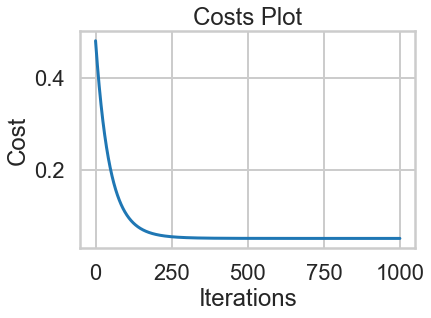

In [13]:
#Plot the costs as a function of iteration
def plot_costs(cost):
    plt.title("Costs Plot")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.plot(cost)
    plt.show()
    
#Visualization
train_weights = initialize_weights()
train_cost, actual_weights = grad_descent(x_train, y_train, 1000, train_weights)
plot_costs(train_cost)

In [14]:
#Predict y for train set and calculate the cost
predict_y_train = predict(x_train, actual_weights[-1])
predict_y_train_cost = compute_cost(y_train, predict_y_train)
print("The Predict y train set cost is", predict_y_train_cost)

The Predict y train set cost is 0.051079827865479224


In [15]:
#Predict y for test set and calculate the cost
predicted_y_test = predict(x_test, actual_weights[-1])
predict_y_test_cost = compute_cost(y_test, predicted_y_test)
print("The Predict y test set cost is", predict_y_test_cost)

The Predict y test set cost is 0.052448649265712334


# Revert data to Original Form

In [16]:
#Going back to the Original data values

#Remove column X
df_col = df.drop(columns=['X'])

df[df.columns[1:]] = df_mean + (df_col * df_std)

df

,X,TV,radio,newspaper,sales
1,1,230.1,37.8,69.2,22.1
2,1,44.5,39.3,45.1,10.4
3,1,17.2,45.9,69.3,9.3
4,1,151.5,41.3,58.5,18.5
5,1,180.8,10.8,58.4,12.9
...,...,...,...,...,...
196,1,38.2,3.7,13.8,7.6
197,1,94.2,4.9,8.1,9.7
198,1,177.0,9.3,6.4,12.8
199,1,283.6,42.0,66.2,25.5


# Cost Result Observation

In [17]:
#x_df data without sales
#y__df sales data
x_df = df.drop(columns=['sales'])
y_df = df['sales']

predicted_y = predict(x_df,actual_weights[-1])

#Cost of original data
cost_df = compute_cost(predicted_y, y_df)

print("The cost of the original data is", cost_df)

The cost of the original data is 7508.733060086956


The predict y train set cost is 0.051079827865479224 and the predict y test set cost is 0.052448649265712334 while the cost of the original data is 7508.733060086956. As you can see, it is different by a large margin where the cost from the original data is much higher compared to the other two. This would mean that our calculated weights is not fit to be used to predict the sales.

# Questions and Solutions

# 1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:  $ℎ_{𝜃}$(𝑥) = $𝜃_{0}$ + $𝜃_{1}$𝑇𝑉 + $𝜃_{2}$𝑅𝑎𝑑𝑖𝑜 + $𝜃_{3}$𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟  

# What are your interpretations regarding the formed linear model?

In [18]:
#Similar to our Costs Plot above but this time, we use our initialized weights
weights = initialize_weights()

train_cost, actual_weights = grad_descent(x_train, y_train, 1000, weights)
print("The optimal weights are:", actual_weights[-1])

The optimal weights are: [4.56992299e-04 7.37379195e-01 5.35670842e-01 3.87472836e-03]


In this problem, I plugged the initialized weights for the weights. 
Thus, we have array([4.56992299e-04, 7.37379195e-01, 5.35670842e-01, 3.87472836e-03])
Now, we will substitute the values inside the array to $𝜃_{0}$, $𝜃_{1}$, $𝜃_{2}$, and $𝜃_{3}$, respectively.

So, our linear model is $ℎ_{𝜃}$(𝑥) = 4.56992299e-04 + (7.37379195e-01 * 𝑇𝑉) + (5.35670842e-01 *𝑅𝑎𝑑𝑖𝑜) + (3.87472836e-03 * 𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟)

It can be interpreted that the linear model's greatest predictor is the TV and lowest is the Newspaper. When we look at it in a real-world scenario, this is to be expected because the new generation prefers TV more.

# 2. Provide a scatter plot of the $(\hat{y^{(i)}})$ and $y^{(i)}$ for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn)

Train set's r2 score is 0.8936787899351376


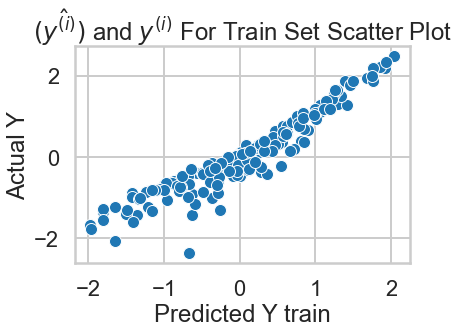

In [19]:
#For Train set

y_train_pred = predict(x_train, actual_weights[-1])

plt.title("$(\hat{y^{(i)}})$ and $y^{(i)}$ For Train Set Scatter Plot")
plt.xlabel("Predicted Y train")
plt.ylabel("Actual Y")

sns.scatterplot(x=y_train_pred, y=y_train)

r2_train = r2_score(y_train, y_train_pred)
print("Train set's r2 score is", r2_train)

Test set's r2 score is 0.9109837509881751


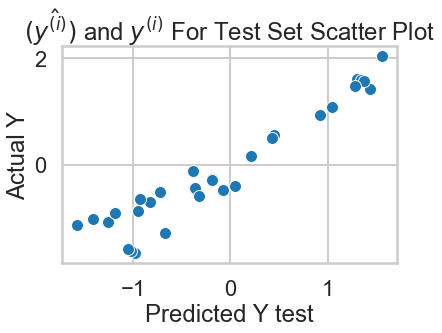

In [20]:
#For Test set

y_test_pred = predict(x_test, actual_weights[-1])

plt.title("$(\hat{y^{(i)}})$ and $y^{(i)}$ For Test Set Scatter Plot")
plt.xlabel("Predicted Y test")
plt.ylabel("Actual Y")

sns.scatterplot(x=y_test_pred, y=y_test)

r2_test = r2_score(y_test, y_test_pred)
print("Test set's r2 score is", r2_test)

As we can see from both Scatter Plots, there is an upward trend.

# 3. What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

In [21]:
#We do this again but itnstead of 1000, we do 50,000 iterations

weights = initialize_weights()
train_cost2, actual_weights2 = grad_descent(x_train, y_train, 50000, weights)

In [22]:
#For 100 iterations
predicted_y100 = predict(x, actual_weights2[99])
MAE_100 = mean_absolute_error(y, predicted_y100)
r2_100 = r2_score(y, predicted_y100)


print("===For 100 Iterations===")
print("MAE is", MAE_100)
print("r2 is", r2_100)
print("Cost is", train_cost2[99])

===For 100 Iterations===
MAE is 0.3492286681395609
r2 is 0.7792416238745812
Cost is 0.10574379840365934


In [23]:
#For 1000 iterations
predicted_y1000 = predict(x, actual_weights2[999])
MAE_1000 = mean_absolute_error(y, predicted_y1000)
r2_1000 = r2_score(y, predicted_y1000)


print("===For 1000 Iterations===")
print("MAE is", MAE_1000)
print("r2 is", r2_1000)
print("Cost is", train_cost2[999])

===For 1000 Iterations===
MAE is 0.2399596550148806
r2 is 0.8969142691949463
Cost is 0.051079831065374885


In [24]:
#For 10,000 iterations
predicted_y10000 = predict(x, actual_weights2[9999])
MAE_10000 = mean_absolute_error(y, predicted_y10000)
r2_10000 = r2_score(y, predicted_y10000)


print("===For 10,000 Iterations===")
print("MAE is", MAE_10000)
print("r2 is", r2_10000)
print("Cost is", train_cost2[9999])

===For 10,000 Iterations===
MAE is 0.23988863657724152
r2 is 0.8969225203073516
Cost is 0.05107955472978693


In [25]:
#For 30,000 iterations
predicted_y30000 = predict(x, actual_weights2[29999])
MAE_30000 = mean_absolute_error(y, predicted_y30000)
r2_30000 = r2_score(y, predicted_y30000)


print("===For 30,000 Iterations===")
print("MAE is", MAE_30000)
print("r2 is", r2_30000)
print("Cost is", train_cost2[29999])

===For 30,000 Iterations===
MAE is 0.23988863657724152
r2 is 0.8969225203073516
Cost is 0.05107955472978693


In [26]:
#For 50,000 iterations
predicted_y50000 = predict(x, actual_weights2[49999])
MAE_50000 = mean_absolute_error(y, predicted_y50000)
r2_50000 = r2_score(y, predicted_y50000)


print("===For 50,000 Iterations===")
print("MAE is", MAE_50000)
print("r2 is", r2_50000)
print("Cost is", train_cost2[49999])

===For 50,000 Iterations===
MAE is 0.23988863657724152
r2 is 0.8969225203073516
Cost is 0.05107955472978693


My observation is that as the number of iterations increases, the error decreases, the r2 increased but stayed the same after 10,000th iteration, and the cost had a fluctuation where it increased in the 1000th iteration then went down to the 10,000th iteration and stayed the same until the 50,000th iteration. 

# 4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

In [27]:
#Round off the train costs to three decimal places.
rounded_train_cost = np.round(train_cost, 3)

#Look for the iteration that the cost is equal to 0.051 based on the result above.
optimal = np.where(rounded_train_cost == 0.051)

#Print the first element.
print("The optimal number of iterations is", optimal[0][0])

The optimal number of iterations is 395


In [28]:
#Checking the effect on the cost and error the learning rate changes (0.1, 0.01, 0.001, 0.0001, 0.2)

learning_rate = [0.1, 0.01, 0.001, 0.0001, 0.2]
costs = []
optimal_iteration = optimal[0][0]

for iteration in learning_rate:
    print("If the learning rate is", iteration)
    train_costs, actual_iteration_weights = grad_descent(x_train, y_train, optimal_iteration, weights, a=iteration)
    costs.append(train_costs)
    
    predicted_y_train = predict(x_train, actual_iteration_weights[-1])
    cost_1 = compute_cost(y_train, predicted_y_train)
    predicted_y = predict(x, actual_iteration_weights[-1])
    computed_r2 = r2_score(y, predicted_y)
    MAE = mean_absolute_error(y, predicted_y)
    
    #Printing out results
    print("Cost is", train_costs[-1])
    print("MAE is", MAE)
    print("r2 is", computed_r2)
    print("\n")

If the learning rate is 0.1
Cost is 0.051079554729786925
MAE is 0.2398886365786446
r2 is 0.8969225203072294


If the learning rate is 0.01
Cost is 0.051500250039664096
MAE is 0.24272053055351145
r2 is 0.8953717254069102


If the learning rate is 0.001
Cost is 0.23622673852442644
MAE is 0.563782776791368
r2 is 0.5060374784393623


If the learning rate is 0.0001
Cost is 0.44536428998765176
MAE is 0.7890090157139464
r2 is 0.07286799176886316


If the learning rate is 0.2
Cost is 0.051079554729786925
MAE is 0.239888636577241
r2 is 0.8969225203073514




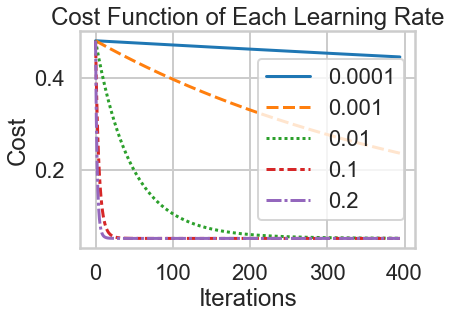

In [29]:
#Visualize the cost function

cost_data_frame = pd.DataFrame(costs).T
cost_data_frame.columns = learning_rate

plt.title("Cost Function of Each Learning Rate")
plt.xlabel("Iterations")
plt.ylabel("Cost")
sns.lineplot(data=cost_data_frame)
plt.show()

Looking at the above plot, we can infer that the rates 0.2, 0.1, and 0.01 reached the lowest cost. This can be supported by the result above where their costs are almost similar (0.05) with little difference. While 0.001 and 0.0001 did not because their cost went above the other 3 rates. Additionally, we can also say that 0.1 and 0.2 reached the lowest cost because both of them got 0.051079554729786925. 

For the Error, 0.2 got the lowest while 0.1 got the highest. Also, for the r2, 0.001 got the lowest while the highest one was 0.2.

# 5. Is there a relationship on the learning rate and the number of iterations?

Yes, and it is called an inverse relationship. It is called an inverse relationship because as the learning rate increases, the iterations to get to the optimal cost decreases. It is also described as a negative relationship.

# 6. Compare the results with the results of ordinary least squares function. 

In [30]:
#Using Linear Regression

linear_regression = LinearRegression().fit(x_train,y_train)
linear_predicted_y = linear_regression.predict(x_test)
linear_predicted_y

array([ 0.44441111,  1.30168679,  1.43691235, -0.66730857,  1.55533551,
       -0.19033088,  1.34451196, -1.25613029, -0.07239572,  0.21395403,
       -0.9477649 , -1.4143734 ,  0.04187445, -0.9794427 , -0.82941714,
       -0.35860114, -1.02352749,  0.43360346, -0.72253191,  0.92669059,
        1.04134773, -0.18638735, -0.32341141,  1.3765889 , -1.1785509 ,
       -1.57241482,  1.28461088, -0.38557956, -0.92832092, -1.05226106])

In [31]:
#r2 
r2 = linear_regression.score(x_test,y_test)
print("r2 score using linear regression is", r2)

r2 score using linear regression is 0.9110275702091714


In [32]:
#We use the weight of the optimal iteration of the gradient descent
optimal_predicted_y = predict(x_test, actual_weights[394])
optimal_predicted_y

array([ 0.45632242,  1.28440583,  1.42255522, -0.6482762 ,  1.47624351,
       -0.16993274,  1.30064552, -1.2352999 , -0.07222912,  0.21357984,
       -0.96178875, -1.37293563,  0.1208764 , -0.98922631, -0.79911416,
       -0.33197871, -0.9948767 ,  0.40902538, -0.70284619,  0.88597173,
        1.06582203, -0.09822649, -0.35109566,  1.3892682 , -1.1769486 ,
       -1.53434624,  1.2500434 , -0.39232188, -0.90517284, -1.0666816 ])

In [33]:
#calculate the r2 score
optimal_r2 = r2_score(y_test, optimal_predicted_y)
print("r2 score using the optimal weight is", optimal_r2)

r2 score using the optimal weight is 0.906288920753653


The r2 score using linear regression is 0.9110275702091714 while the r2 score using the optimal weight is 0.906288920753653. We can se that the r2 score using linear regression is much higher that when we use the r2 score using our optimal weight. This only indicates that the linear regression is better suited for the model.

# -END-